In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv("./USWTDB Wrangled.csv")

**PART-1:** EXPLORATORY DATA ANALYSES

KEY QUESTIONS:
1. How many columns are there?
2. What are the columns headers?
3. How the dataframe is arrage?
4. What data types are those columns?
5. Which columns nulls?

KEY OUTCOMES:
1. No nulls in my columns of interest, in this case project year.
2. Prepare a new dataset with a column "cumulative_number_of_windturbine)
3. Data ready for for a forecast modeling using ARIMA


In [3]:
data.shape  #KQ- 1|

(72669, 27)

In [4]:
data.columns #KQ- 2

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id', 't_state',
       't_county', 't_fips', 'project_name', 'project_year', 'turbine_count',
       'project_capacity', 't_manufacturer', 't_model', 't_capacity',
       't_hub_height', 't_diameter', 't_rotor_area', 't_total_height',
       'retrofit', 'retrofit_year', 't_conf_atr', 't_conf_loc', 't_img_date',
       't_img_srce', 'xlong', 'ylat'],
      dtype='object')

In [5]:
data.head() #KQ- 3

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,project_name,project_year,...,t_rotor_area,t_total_height,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3072695,NaN,NaN,5143.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.364410,35.077435
1,3072661,NaN,NaN,5149.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.363762,35.077908
2,3072704,NaN,NaN,5146.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,0,NaN,2,3,5/8/2018,Digital Globe,-118.364197,35.077644
3,3063269,19-028130,2016-WTE-5934-OE,NaN,NaN,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,...,12271.85,150.0,0,NaN,3,3,7/23/2017,Digital Globe,-93.632835,41.882477
4,3057059,19-027954,2016-WTE-9485-OE,NaN,NaN,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,...,12271.85,150.0,0,NaN,3,3,5/13/2017,Digital Globe,-93.623009,41.881470


In [6]:
data.info() #KQ- 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72669 entries, 0 to 72668
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_id           72669 non-null  int64  
 1   faa_ors           67310 non-null  object 
 2   faa_asn           67537 non-null  object 
 3   usgs_pr_id        37904 non-null  float64
 4   eia_id            68347 non-null  float64
 5   t_state           72669 non-null  object 
 6   t_county          72669 non-null  object 
 7   t_fips            72669 non-null  int64  
 8   project_name      72669 non-null  object 
 9   project_year      72113 non-null  float64
 10  turbine_count     72669 non-null  int64  
 11  project_capacity  69255 non-null  float64
 12  t_manufacturer    68096 non-null  object 
 13  t_model           67959 non-null  object 
 14  t_capacity        68267 non-null  float64
 15  t_hub_height      67771 non-null  float64
 16  t_diameter        67829 non-null  float6

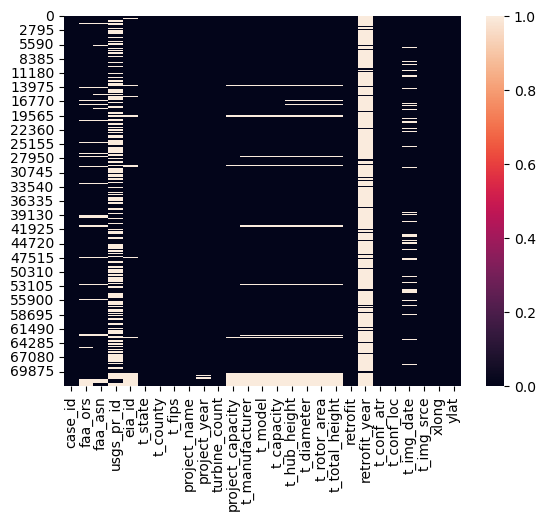

In [7]:
sns.heatmap(data.isnull());   #KQ- 5

There are only a few null value in project_year column. The number of rows with a null value for preject_year is very small considering the size of the dataset. So deleting the rows with null will not impact the overall dataset.

So I want to delete the null rows inplace.

In [8]:
data.dropna(subset=["project_year"], inplace=True)


Lets take a look at the project_year column

In [9]:
data["project_year"]

0        1987.0
1        1987.0
2        1987.0
3        2017.0
4        2017.0
          ...  
72664    2022.0
72665    2022.0
72666    2011.0
72667    2016.0
72668    2016.0
Name: project_year, Length: 72113, dtype: float64

These years are float64 datatype. So let's convert them to a datetime object and have a yyyy-mm-dd

In [10]:
# pd.to_datetime(data["project_year"])
data["project_year"] = pd.to_datetime(data["project_year"], format="%Y")



Now let's see how the project_year column looks

In [11]:
data["project_year"]

0       1987-01-01
1       1987-01-01
2       1987-01-01
3       2017-01-01
4       2017-01-01
           ...    
72664   2022-01-01
72665   2022-01-01
72666   2011-01-01
72667   2016-01-01
72668   2016-01-01
Name: project_year, Length: 72113, dtype: datetime64[ns]

So now the data type is datetime64[ns] and the format looks exactly what I wanted.

In [12]:
# the following code prints the dataframe. but this dataframe is way too big to be printed so don't print this.
# print(data.to_string())

Now lets make a plot. I want to see a plot that shows the number of Wind Turbine added each year for the years in the dataset:

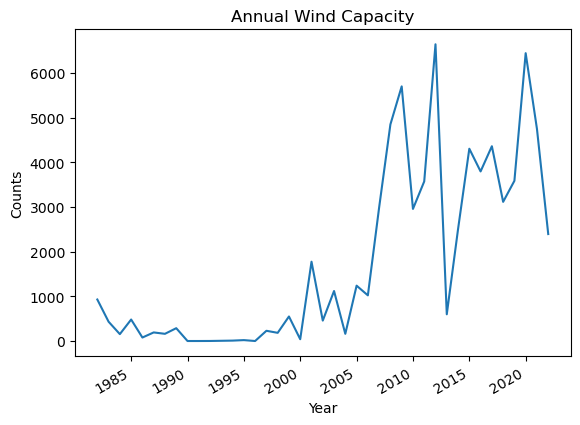

In [13]:
data.groupby("project_year")["case_id"].count().plot()
plt.title("Annual Wind Capacity")
plt.xlabel("Year")
plt.ylabel("Counts")
plt.show;

Now lets make a table with the output and name the columns as "year" and "count":

In [14]:
counts_in_years = data['project_year'].value_counts().sort_index().reset_index()
counts_in_years.columns = ['year', 'count']

Now let's make it a pandas dataframe:

In [15]:
df = pd.DataFrame(counts_in_years)
df

,year,count
0,1982-01-01,930
1,1983-01-01,433
2,1984-01-01,155
3,1985-01-01,482
4,1986-01-01,79
5,1987-01-01,193
6,1988-01-01,162
7,1989-01-01,288
8,1990-01-01,1
9,1991-01-01,1


to create a predictive model let's create a column with the cumulative number of wind turbine and:

In [16]:
df["cumulative_windturbine_num"] = df["count"].cumsum()

In [17]:
df.info() #just checking if Dtype of "year" has be impacted unintentionaly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   year                        40 non-null     datetime64[ns]
 1   count                       40 non-null     int64         
 2   cumulative_windturbine_num  40 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 KB


Everything looks great lets set the year column as index:

In [18]:
df.set_index("year", inplace=True) 

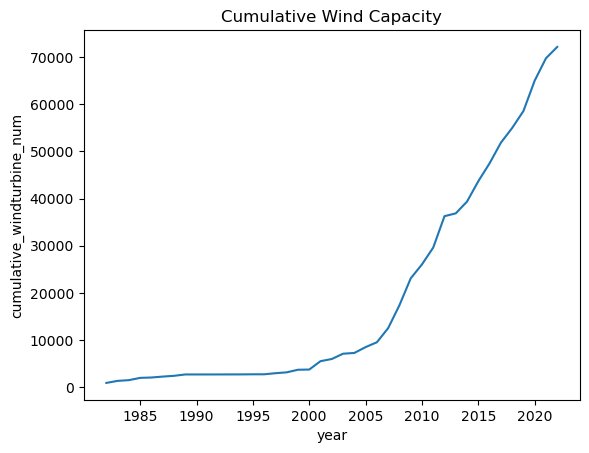

In [19]:
sns.lineplot(x= df.index, y="cumulative_windturbine_num", data=df)
# sns.lineplot(x= df.index, y="count", data=df)
plt.title("Cumulative Wind Capacity");

**Now time for some modeling:**

**Step 1:** import the from statsmodels.tsa.arima.model import ARIMA (it has been imported in the cell 1)
**Step 2:** resample the data on a yearly frequency.

In [20]:
growth_over_year = df.resample("Y")["cumulative_windturbine_num"].mean()

In [21]:
decomposition = seasonal_decompose(growth_over_year)
fig = plt.figure()
fig = decomposition.plot()

ValueError: This function does not handle missing values

lets check if where is the missing data

In [22]:
df.index

DatetimeIndex(['1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

**Looking at the index it is clean that year 1993-01-01 is missing.**

In [23]:
df

,count,cumulative_windturbine_num
year,,
1982-01-01,930,930
1983-01-01,433,1363
1984-01-01,155,1518
1985-01-01,482,2000
1986-01-01,79,2079
1987-01-01,193,2272
1988-01-01,162,2434
1989-01-01,288,2722
1990-01-01,1,2723


Lets insert a row where count = 0 and cumulative_windturbine_num = 2726 since at the end ot 1992 the cumulative number wind turbine was 2726

In [24]:
new_row = {'count': 0,
           "cumulative_windturbine_num":2726}
new_date = pd.to_datetime('1993-01-01')

In [25]:
df.loc[new_date] = new_row

In [26]:
df.loc["1993-01-01"] #just checking

count                            0
cumulative_windturbine_num    2726
Name: 1993-01-01 00:00:00, dtype: int64

In [27]:
growth_over_year = df.resample("Y")["cumulative_windturbine_num"].mean()

<Figure size 640x480 with 0 Axes>

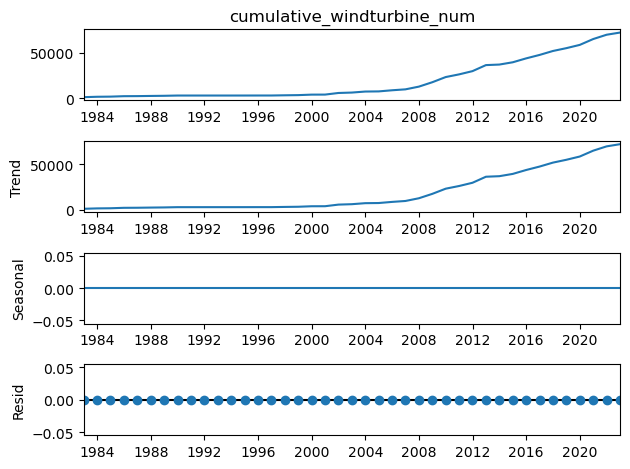

In [28]:
decomposition = seasonal_decompose(growth_over_year)
fig = plt.figure()
fig = decomposition.plot()

Lets divide this data set as train and test data

In [29]:
train = growth_over_year["1998-01-01": "2017-01-01"].astype(float)
test = growth_over_year["2017-01-01" : "2022-01-01"].astype(float)

Let's check out how does the test and train data look:

<AxesSubplot:xlabel='year'>

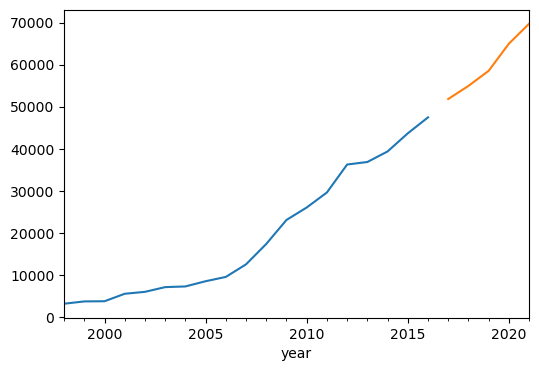

In [30]:
fig, ax = plt.subplots(figsize = (6,4))
train.plot()
test.plot()

Now we are finally ready to use ARIMA model to generate a prediction regarding the number of Wind Turbine by 2025. For this dataset I will use the following values for order=(1,1,1). These values are also known as p, d, q. Here the order=(1,1,1) means that we are using an ARIMA model with 1 autoregressive term, 1 differencing term, and 1 moving average term. When there is a apparent trend in the data the q = 1 (differencing term) is used.
Since our data has apparent trend I am using order=(1,1,1). In case no apparent trend I would have used order=(1,0,1).  

In [34]:
model = ARIMA(train, order=(1,1,1)).fit() 

/Users/chowdhury/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Now let's do get some predictions.

In [31]:
y_pred = model.predict(start="1998-01-01", end="2022-01-01")
fig, ax = plt.subplots(figsize=(8, 4))

/Users/chowdhury/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

Okay let's see what is going on and why the start argument could not be matched

In [36]:
train.index

DatetimeIndex(['1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='year', freq='A-DEC')

***Since we resampled the data at a yearly frequency. The training data index got set at the end of the year. So we just need to change the prediction start date and end date.***

In [42]:
y_pred = model.predict(start="2017-12-31", end="2025-12-31")

***Now let's plot:***

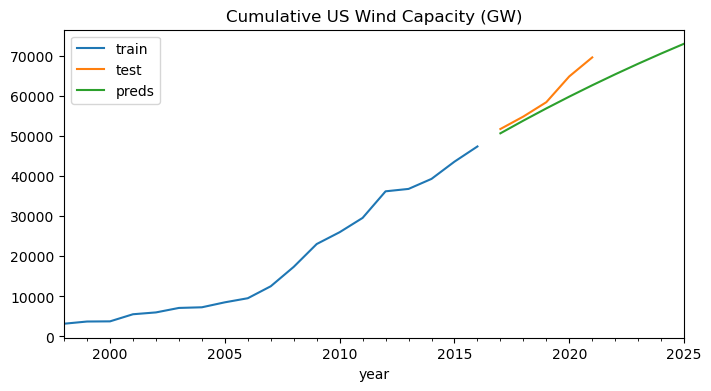

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))
train.plot(label="train")
test.plot(label="test")
y_pred.plot(label="preds")
plt.title("Cumulative US Wind Capacity (GW)")
ax.legend();

With that there you go we have the prediction that capture the general trend in Cumulative US Wind Capacity

In [ ]:

# growth_over_year = new_data.resample("Y")["Cumulative US Wind Capacity (GW)"].mean()

# decomposition = seasonal_decompose(growth_over_year)
# fig = plt.figure()
# fig = decomposition.plot()

# # train = growth_over_year["1998-01-01": "2017-01-01"].astype(float)
# # test = growth_over_year["2017-01-01" : "2021-01-01"].astype(float)

# fig, ax = plt.subplots(figsize = (6,4))
# train.plot()
# test.plot()

# model = ARIMA(train, order=(1,1,1)).fit()  # Corrected parentheses
# y_pred = model.predict(start="1998-12-31", end="2023-12-31")
# fig, ax = plt.subplots(figsize=(8, 4))  # Removed extra spaces

# train.plot(label="train")
# test.plot(label="test")
# y_pred.plot(label="preds")
# plt.title("Cumulative US Wind Capacity (GW)")
# ax.legend()


In [ ]:
df